In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

import crowsetta
import vak

In [2]:
prep_csv_path = Path('~/Documents/data/BFSongRepository/gy6or6/vak/predict/032412_prep_200510_152529.csv').expanduser().resolve()
predict_df = pd.read_csv(prep_csv_path)
predict_csv_path =  Path('~/Documents/data/BFSongRepository/032412_prep_200510_152529.annot.csv').expanduser().resolve()
annots = crowsetta.csv.csv2annot(predict_csv_path)

In [3]:
prep_csv_path_maj_vote = Path('~/Documents/data/BFSongRepository/gy6or6/vak/predict/032412_prep_200615_074613.csv').expanduser().resolve()
predict_maj_vote_df = pd.read_csv(prep_csv_path_maj_vote)
predict_maj_vote_csv_path = Path('~/Documents/data/BFSongRepository/032412_prep_200615_074613.annot.csv').expanduser().resolve()
annots_maj_vote = crowsetta.csv.csv2annot(predict_maj_vote_csv_path)

In [4]:
predict_df.iloc[10:20,:]

,audio_path,spect_path,annot_path,annot_format,duration,timebin_dur,split
10,/home/art/Documents/data/birdsong/BFSongReposi...,/home/art/Documents/data/birdsong/BFSongReposi...,NaN,none,11.572,0.002,predict
11,/home/art/Documents/data/birdsong/BFSongReposi...,/home/art/Documents/data/birdsong/BFSongReposi...,NaN,none,13.054,0.002,predict
12,/home/art/Documents/data/birdsong/BFSongReposi...,/home/art/Documents/data/birdsong/BFSongReposi...,NaN,none,10.050,0.002,predict
13,/home/art/Documents/data/birdsong/BFSongReposi...,/home/art/Documents/data/birdsong/BFSongReposi...,NaN,none,7.624,0.002,predict
14,/home/art/Documents/data/birdsong/BFSongReposi...,/home/art/Documents/data/birdsong/BFSongReposi...,NaN,none,8.046,0.002,predict
15,/home/art/Documents/data/birdsong/BFSongReposi...,/home/art/Documents/data/birdsong/BFSongReposi...,NaN,none,11.098,0.002,predict
16,/home/art/Documents/data/birdsong/BFSongReposi...,/home/art/Documents/data/birdsong/BFSongReposi...,NaN,none,12.262,0.002,predict
17,/home/art/Documents/data/birdsong/BFSongReposi...,/home/art/Documents/data/birdsong/BFSongReposi...,NaN,none,7.436,0.002,predict
18,/home/art/Documents/data/birdsong/BFSongReposi...,/home/art/Documents/data/birdsong/BFSongReposi...,NaN,none,10.140,0.002,predict
19,/home/art/Documents/data/birdsong/BFSongReposi...,/home/art/Documents/data/birdsong/BFSongReposi...,NaN,none,11.162,0.002,predict


In [5]:
predict_maj_vote_df.iloc[10:20,:]

,audio_path,spect_path,annot_path,annot_format,duration,timebin_dur,split
10,/home/art/Documents/data/BFSongRepository/gy6o...,/home/art/Documents/data/BFSongRepository/gy6o...,NaN,none,11.572,0.002,predict
11,/home/art/Documents/data/BFSongRepository/gy6o...,/home/art/Documents/data/BFSongRepository/gy6o...,NaN,none,13.054,0.002,predict
12,/home/art/Documents/data/BFSongRepository/gy6o...,/home/art/Documents/data/BFSongRepository/gy6o...,NaN,none,10.050,0.002,predict
13,/home/art/Documents/data/BFSongRepository/gy6o...,/home/art/Documents/data/BFSongRepository/gy6o...,NaN,none,7.624,0.002,predict
14,/home/art/Documents/data/BFSongRepository/gy6o...,/home/art/Documents/data/BFSongRepository/gy6o...,NaN,none,8.046,0.002,predict
15,/home/art/Documents/data/BFSongRepository/gy6o...,/home/art/Documents/data/BFSongRepository/gy6o...,NaN,none,11.098,0.002,predict
16,/home/art/Documents/data/BFSongRepository/gy6o...,/home/art/Documents/data/BFSongRepository/gy6o...,NaN,none,12.262,0.002,predict
17,/home/art/Documents/data/BFSongRepository/gy6o...,/home/art/Documents/data/BFSongRepository/gy6o...,NaN,none,7.436,0.002,predict
18,/home/art/Documents/data/BFSongRepository/gy6o...,/home/art/Documents/data/BFSongRepository/gy6o...,NaN,none,10.140,0.002,predict
19,/home/art/Documents/data/BFSongRepository/gy6o...,/home/art/Documents/data/BFSongRepository/gy6o...,NaN,none,11.162,0.002,predict


In [6]:
def spect_annot(s, 
                t,
                f,
                annot,
                figsize=(20, 7.5),
                tlim=None,
                labelsize=16):
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(3, 3)
    s_ax = fig.add_subplot(gs[:2, :])
    annot_ax = fig.add_subplot(gs[2, :])

    extent = [t.min(), t.max(), f.min(), f.max()]

    s_ax.imshow(s, 
                aspect='auto',
                origin='lowest',
                vmin=0, vmax=5,
                extent=extent);

    segments = np.zeros(t.shape[-1])
    segment_centers = []
    for on, off in zip(annot.seq.onsets_s, annot.seq.offsets_s):
        t_on_ind = np.argmin(np.abs(t - on))
        t_off_ind = np.argmin(np.abs(t - off))
        segments[t_on_ind:t_off_ind] = 0.5
        segment_centers.append(
            int(np.round(np.mean([t_on_ind, t_off_ind])))
        )
    annot_ax.plot(t, segments)
    annot_ax.set_ylim(0, 1)

    labels = annot.seq.labels
        
    if tlim:
        s_ax.set_xlim(tlim)
        annot_ax.set_xlim(tlim)
        
        labels = []
        segment_centers_tmp = []
        for label, segment_center in zip(annot.seq.labels, segment_centers):
            if t[segment_center] > tlim[0] and t[segment_center] < tlim[1]:
                labels.append(label)
                segment_centers_tmp.append(segment_center)
        segment_centers = segment_centers_tmp
    else:
        labels = annot.seq.labels
    
    for label, segment_center in zip(labels, segment_centers):
        annot_ax.text(t[segment_center], 0.6, label, fontsize=labelsize)

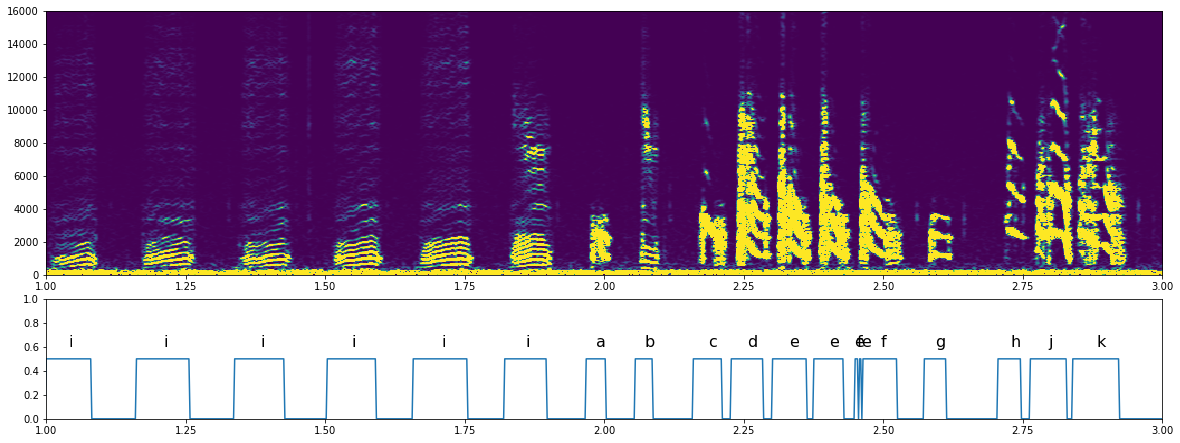

In [7]:
spect_file = vak.files.spect.load(predict_maj_vote_df.iloc[0, :].spect_path)
s, f, t = spect_file['s'], spect_file['f'], spect_file['t']
annot = annots[0]
spect_annot(s, t, f, annot, tlim=(1, 3))

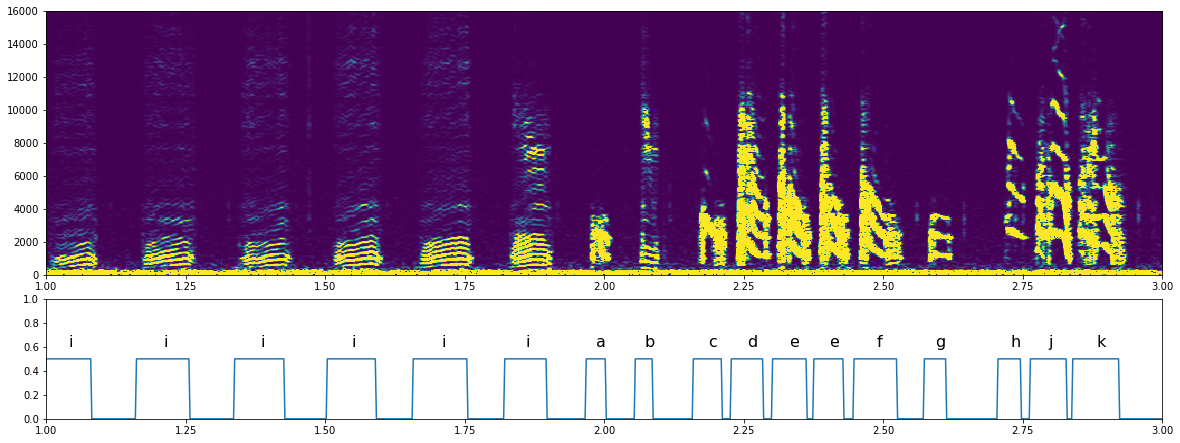

In [8]:
spect_file = vak.files.spect.load(predict_maj_vote_df.iloc[0, :].spect_path)
s, f, t = spect_file['s'], spect_file['f'], spect_file['t']
annot = annots_maj_vote[0]
spect_annot(s, t, f, annot, tlim=(1, 3))

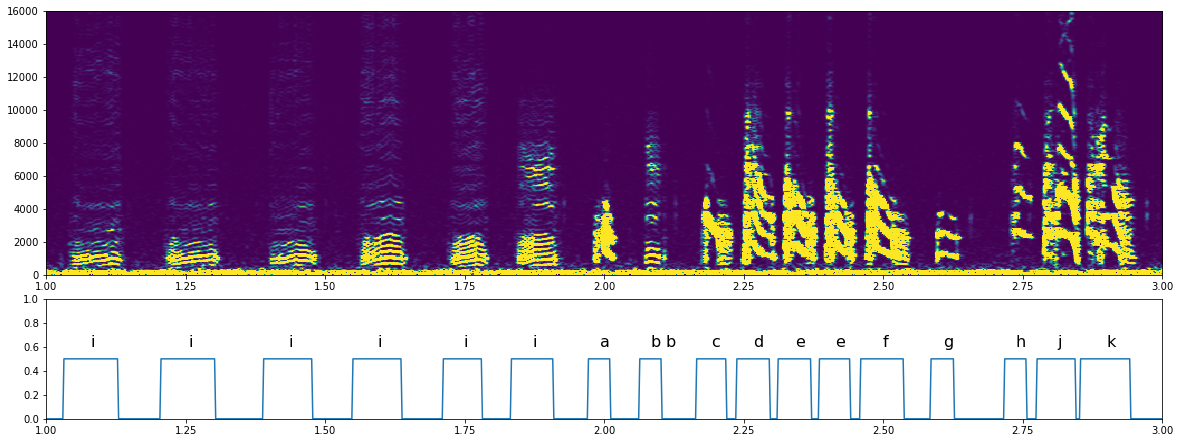

In [9]:
spect_file = vak.files.spect.load(predict_maj_vote_df.iloc[1, :].spect_path)
s, f, t = spect_file['s'], spect_file['f'], spect_file['t']
annot = annots[1]
spect_annot(s, t, f, annot, tlim=(1, 3))

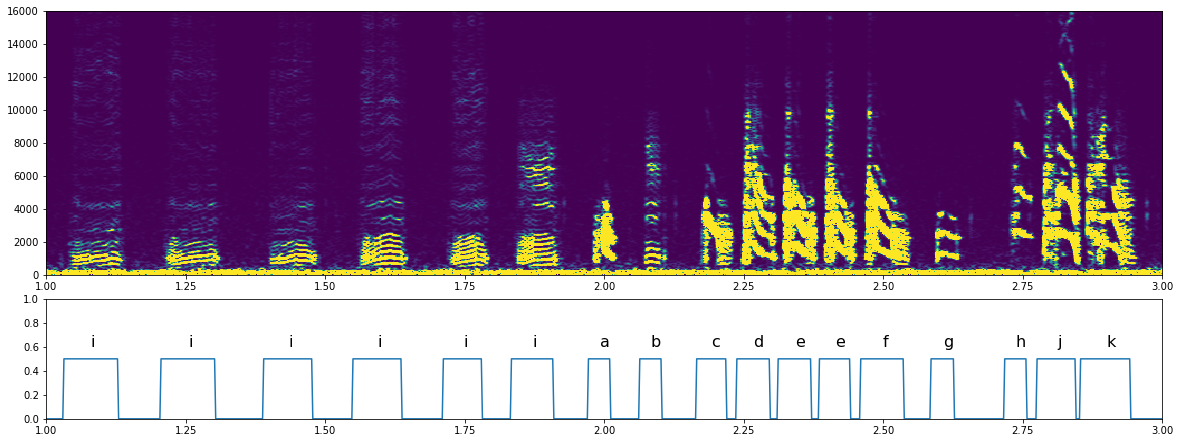

In [10]:
spect_file = vak.files.spect.load(predict_maj_vote_df.iloc[1, :].spect_path)
s, f, t = spect_file['s'], spect_file['f'], spect_file['t']
annot = annots_maj_vote[1]
spect_annot(s, t, f, annot, tlim=(1, 3))

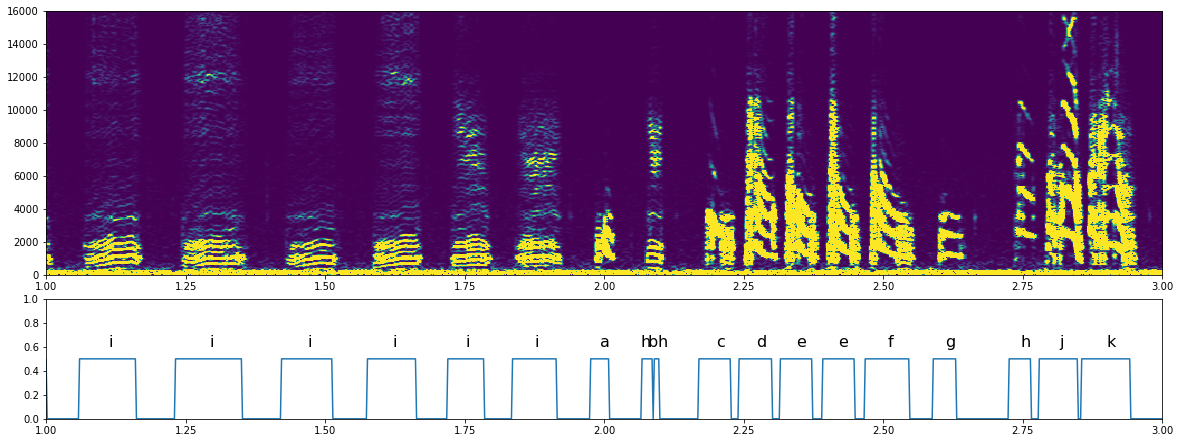

In [11]:
spect_file = vak.files.spect.load(predict_maj_vote_df.iloc[2, :].spect_path)
s, f, t = spect_file['s'], spect_file['f'], spect_file['t']
annot = annots[2]
spect_annot(s, t, f, annot, tlim=(1, 3))

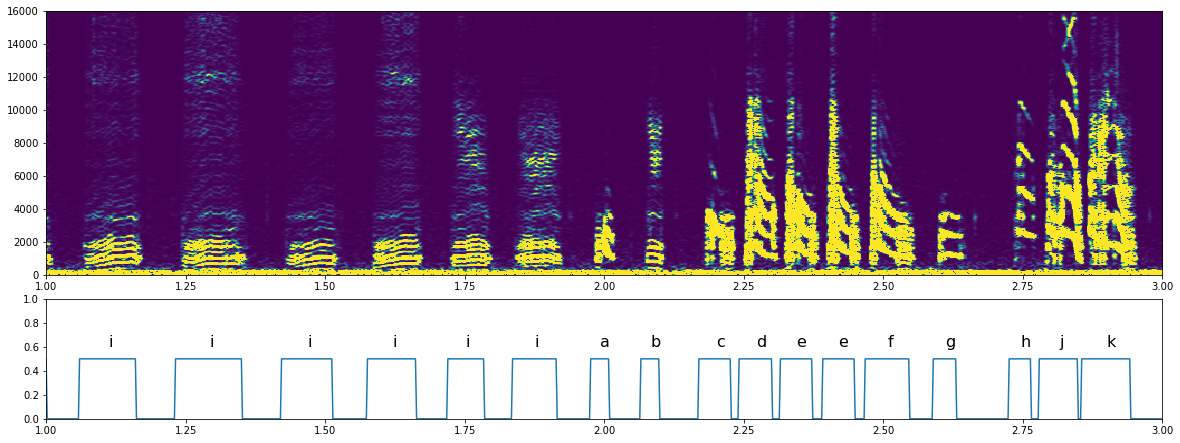

In [12]:
spect_file = vak.files.spect.load(predict_maj_vote_df.iloc[2, :].spect_path)
s, f, t = spect_file['s'], spect_file['f'], spect_file['t']
annot = annots_maj_vote[2]
spect_annot(s, t, f, annot, tlim=(1, 3))

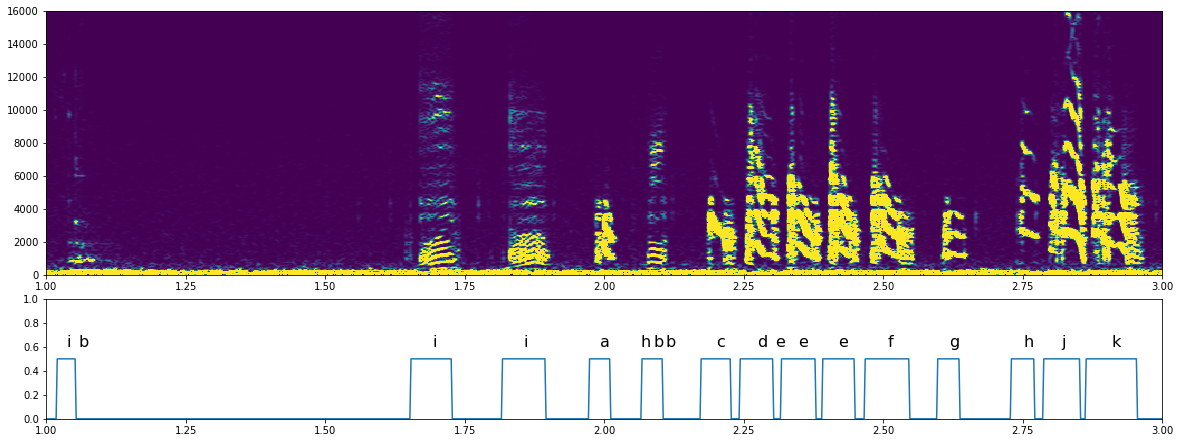

In [13]:
spect_file = vak.files.spect.load(predict_maj_vote_df.iloc[4, :].spect_path)
s, f, t = spect_file['s'], spect_file['f'], spect_file['t']
annot = annots[4]
spect_annot(s, t, f, annot, tlim=(1, 3))

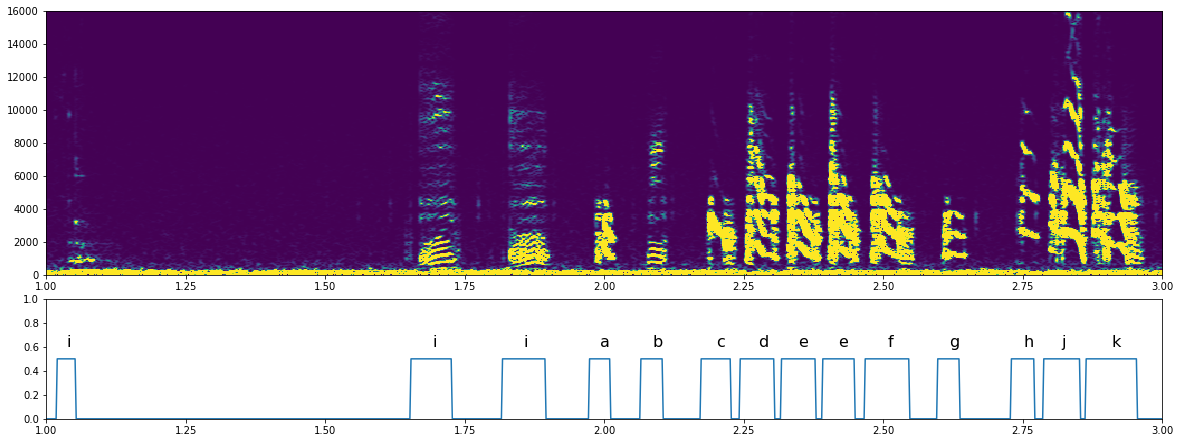

In [14]:
spect_file = vak.files.spect.load(predict_maj_vote_df.iloc[4, :].spect_path)
s, f, t = spect_file['s'], spect_file['f'], spect_file['t']
annot = annots_maj_vote[4]
spect_annot(s, t, f, annot, tlim=(1, 3))

In [15]:
annot_df_maj_vote = pd.read_csv(predict_maj_vote_csv_path)

In [17]:
annot_df_maj_vote[annot_df_maj_vote['annotation'] == 1]

,label,onset_s,offset_s,onset_Hz,offset_Hz,audio_file,annot_file,sequence,annotation
51,i,0.704,0.704,None,None,gy6or6_baseline_240312_0814.1193.cbin,032412_prep_200615_074613.annot.csv,0,1
52,i,0.708,0.778,None,None,gy6or6_baseline_240312_0814.1193.cbin,032412_prep_200615_074613.annot.csv,0,1
53,i,0.880,0.950,None,None,gy6or6_baseline_240312_0814.1193.cbin,032412_prep_200615_074613.annot.csv,0,1
54,i,1.032,1.130,None,None,gy6or6_baseline_240312_0814.1193.cbin,032412_prep_200615_074613.annot.csv,0,1
55,i,1.206,1.304,None,None,gy6or6_baseline_240312_0814.1193.cbin,032412_prep_200615_074613.annot.csv,0,1
56,i,1.390,1.478,None,None,gy6or6_baseline_240312_0814.1193.cbin,032412_prep_200615_074613.annot.csv,0,1
57,i,1.550,1.638,None,None,gy6or6_baseline_240312_0814.1193.cbin,032412_prep_200615_074613.annot.csv,0,1
58,i,1.712,1.782,None,None,gy6or6_baseline_240312_0814.1193.cbin,032412_prep_200615_074613.annot.csv,0,1
59,i,1.834,1.910,None,None,gy6or6_baseline_240312_0814.1193.cbin,032412_prep_200615_074613.annot.csv,0,1
60,a,1.972,2.012,None,None,gy6or6_baseline_240312_0814.1193.cbin,032412_prep_200615_074613.annot.csv,0,1
